# Rossmann Drug Store Chain Sales Prediction

## 1. Problem Definition
Rossmann is Germany's second-largest drug store chain. We have been provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column. The goal of this notebook would be to create a model that would forecast the **sales** by using only the below column inputs:
* Store
* DayOfWeek
* Date
* Customers
* Open
* Promo
* StateHoliday
* SchoolHoliday

![Drug](https://images.unsplash.com/photo-1631549916768-4119b2e5f926?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1179&q=80)

## 2. Datasets
We are given two amounts of data, which are as follows:
* train.csv - _contains sales data on a daily frequency_
* store.csv - _contains store information_

In [109]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
# Import our sales and store dataset
sales_df = pd.read_csv("data/train.csv", low_memory=False, parse_dates=["Date"])
stores_df = pd.read_csv("data/store.csv", low_memory=False)

In [3]:
sales_df.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,2015-04-30,6228,650,1,1,0,0
1,2,4,2015-04-30,6884,716,1,1,0,0
2,3,4,2015-04-30,9971,979,1,1,0,0


In [4]:
stores_df.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


## 3.  Features

### 3.1 Sales Data

In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914629 entries, 0 to 914628
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          914629 non-null  int64         
 1   DayOfWeek      914629 non-null  int64         
 2   Date           914629 non-null  datetime64[ns]
 3   Sales          914629 non-null  int64         
 4   Customers      914629 non-null  int64         
 5   Open           914629 non-null  int64         
 6   Promo          914629 non-null  int64         
 7   StateHoliday   914629 non-null  object        
 8   SchoolHoliday  914629 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 62.8+ MB


In [6]:
# Sort DataFrame in date order.
sales_df.sort_values(by=["Date"], inplace=True, ascending=True, ignore_index=True)
sales_df.Date.head(5)

0   2013-01-01
1   2013-01-01
2   2013-01-01
3   2013-01-01
4   2013-01-01
Name: Date, dtype: datetime64[ns]

In [7]:
# Let us create a restore point of our sales dataset.
sales_df_backup = sales_df.copy(deep=True)

In [111]:
store_ids = sales_df_backup.Store.unique()
store_ids.sort()
store_ids = store_ids[:10]
store_ids

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [ ]:
count=1
plt.subplots(figsize=(20, 16))
# color_dict = dict({1:'dodgerblue', 2:'green', 3: 'orange',4: 'red', 5: 'brown', 6: 'blue'})

for store_id in store_ids:
    plt.subplot(5,2,count)
    temp_df = sales_df_backup[sales_df_backup['Store'] == store_id]
    sns.scatterplot(data=sales_df_backup, x="Date", y="Sales", hue="Store")
    count+=1

plt.show()

In [8]:
sales_df[:1].Date # Tuesday

0   2013-01-01
Name: Date, dtype: datetime64[ns]

In [9]:
sales_df[:1].DayOfWeek 

0    2
Name: DayOfWeek, dtype: int64

In [10]:
#This column that has already been given in our dataset would mean that 1 would be Monday
sales_df.DayOfWeek.unique()

array([2, 3, 4, 5, 6, 7, 1], dtype=int64)

In [11]:
# There is a function that return the day of the week. We won't be using this one.
# It is assumed the week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6.
sales_df[:1].Date.dt.dayofweek

0    1
Name: Date, dtype: int64

In [12]:
sales_df["SaleYear"] = sales_df.Date.dt.year
sales_df["SaleMonth"] = sales_df.Date.dt.month
sales_df["SaleDay"] = sales_df.Date.dt.day
sales_df["SaleDayOfYear"] = sales_df.Date.dt.dayofyear
sales_df.tail().T

,914624,914625,914626,914627,914628
Store,746,747,748,742,1
DayOfWeek,4,4,4,4,4
Date,2015-04-30 00:00:00,2015-04-30 00:00:00,2015-04-30 00:00:00,2015-04-30 00:00:00,2015-04-30 00:00:00
Sales,9469,12123,9524,12225,6228
Customers,748,1017,746,1196,650
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,0,0,0,0,0
SchoolHoliday,0,0,0,0,0
SaleYear,2015,2015,2015,2015,2015


In [13]:
sales_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
SaleYear         0
SaleMonth        0
SaleDay          0
SaleDayOfYear    0
dtype: int64

In [14]:
for label, content in sales_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Date
StateHoliday


In [15]:
sales_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SaleYear,SaleMonth,SaleDay,SaleDayOfYear
0,1115,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1
1,379,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1
2,378,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1
3,377,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1
4,376,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
914624,746,4,2015-04-30,9469,748,1,1,0,0,2015,4,30,120
914625,747,4,2015-04-30,12123,1017,1,1,0,0,2015,4,30,120
914626,748,4,2015-04-30,9524,746,1,1,0,0,2015,4,30,120
914627,742,4,2015-04-30,12225,1196,1,1,0,0,2015,4,30,120


In [16]:
sales_df.StateHoliday.value_counts()

0    887690
a     16149
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [17]:
sales_df["StateHoliday"] = pd.Categorical(sales_df["StateHoliday"]).codes 

In [18]:
pd.Categorical(sales_df["StateHoliday"]).codes

array([1, 1, 1, ..., 0, 0, 0], dtype=int8)

In [19]:
sales_df.StateHoliday.value_counts()

0    887690
1     16149
2      6690
3      4100
Name: StateHoliday, dtype: int64

In [20]:
sales_df.reindex()
sales_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SaleYear,SaleMonth,SaleDay,SaleDayOfYear
0,1115,2,2013-01-01,0,0,0,0,1,1,2013,1,1,1
1,379,2,2013-01-01,0,0,0,0,1,1,2013,1,1,1
2,378,2,2013-01-01,0,0,0,0,1,1,2013,1,1,1
3,377,2,2013-01-01,0,0,0,0,1,1,2013,1,1,1
4,376,2,2013-01-01,0,0,0,0,1,1,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
914624,746,4,2015-04-30,9469,748,1,1,0,0,2015,4,30,120
914625,747,4,2015-04-30,12123,1017,1,1,0,0,2015,4,30,120
914626,748,4,2015-04-30,9524,746,1,1,0,0,2015,4,30,120
914627,742,4,2015-04-30,12225,1196,1,1,0,0,2015,4,30,120


### 3.2 Stores Data

In [24]:
# stores_df = pd.read_csv("data/store.csv", low_memory=False)
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [25]:
stores_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [26]:
# Let us create a restore point of our sales dataset.
stores_df_backup = stores_df.copy(deep=True)

In [43]:
stores_df = stores_df_backup.copy(deep=True)

In [44]:
# Check for Missing Values
stores_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [45]:
stores_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [46]:
numeric_cols = stores_df.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['Store',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear']

In [47]:
# Replace Missing Values
# stores_df = stores_df.fillna(stores_df.median()) # Deprecated
stores_df[numeric_cols] = stores_df[numeric_cols].fillna(stores_df[numeric_cols].median())
stores_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                544
dtype: int64

In [48]:
#### Strings

In [49]:
# Find columns which contains strings
for label, content in stores_df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

StoreType
Assortment
PromoInterval


In [50]:
stores_df.StoreType.value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

In [51]:
stores_df.Assortment.value_counts()

a    593
c    513
b      9
Name: Assortment, dtype: int64

In [52]:
# Turn categorical variables into numbers and fill missing
for label, content in stores_df.items():
     if pd.api.types.is_string_dtype(content) and label != 'PromoInterval':
        # Turn categories into numbers and add 
        stores_df[label] = pd.Categorical(content).codes 

In [53]:
stores_df.StoreType.value_counts()

0    602
3    348
2    148
1     17
Name: StoreType, dtype: int64

In [54]:
stores_df.Assortment.value_counts()

0    593
2    513
1      9
Name: Assortment, dtype: int64

In [55]:
stores_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                544
dtype: int64

In [56]:
# Fill Promo Interval Missing values with a space
stores_df.fillna('', inplace=True)

In [57]:
stores_df.PromoInterval.value_counts()

                    544
Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [58]:
stores_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [60]:
# Make Promo Interval more Meaningful and usable in our model
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
len(months)

12

In [62]:
df_month = pd.DataFrame()
for month in months:
    stores_df.loc[stores_df['PromoInterval'].str.contains(month, case=False), "PromoInterval" + month] = 1
stores_df.head(5).T

,0,1,2,3,4
Store,1,2,3,4,5
StoreType,2,0,0,2,0
Assortment,0,0,0,2,0
CompetitionDistance,1270.0,570.0,14130.0,620.0,29910.0
CompetitionOpenSinceMonth,9.0,11.0,12.0,9.0,4.0
CompetitionOpenSinceYear,2008.0,2007.0,2006.0,2009.0,2015.0
Promo2,0,1,1,0,0
Promo2SinceWeek,22.0,13.0,14.0,22.0,22.0
Promo2SinceYear,2012.0,2010.0,2011.0,2012.0,2012.0
PromoInterval,,"Jan,Apr,Jul,Oct","Jan,Apr,Jul,Oct",,


In [63]:
stores_df.isnull().sum()

Store                           0
StoreType                       0
Assortment                      0
CompetitionDistance             0
CompetitionOpenSinceMonth       0
CompetitionOpenSinceYear        0
Promo2                          0
Promo2SinceWeek                 0
Promo2SinceYear                 0
PromoInterval                   0
PromoIntervalJan              780
PromoIntervalFeb              985
PromoIntervalMar             1009
PromoIntervalApr              780
PromoIntervalMay              985
PromoIntervalJun             1009
PromoIntervalJul              780
PromoIntervalAug              985
PromoIntervalSep             1009
PromoIntervalOct              780
PromoIntervalNov              985
PromoIntervalDec             1009
dtype: int64

In [64]:
stores_df.fillna(0, inplace=True)

In [65]:
stores_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
PromoIntervalJan             0
PromoIntervalFeb             0
PromoIntervalMar             0
PromoIntervalApr             0
PromoIntervalMay             0
PromoIntervalJun             0
PromoIntervalJul             0
PromoIntervalAug             0
PromoIntervalSep             0
PromoIntervalOct             0
PromoIntervalNov             0
PromoIntervalDec             0
dtype: int64

In [77]:
stores_df.to_csv("data/store_details.csv")

### 3.3 Merge DataFrames

In [66]:
sales_merged_df = sales_df.merge(stores_df, on='Store', how='left')

In [67]:
sales_merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SaleYear,...,PromoIntervalMar,PromoIntervalApr,PromoIntervalMay,PromoIntervalJun,PromoIntervalJul,PromoIntervalAug,PromoIntervalSep,PromoIntervalOct,PromoIntervalNov,PromoIntervalDec
0,1115,2,2013-01-01,0,0,0,0,1,1,2013,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,379,2,2013-01-01,0,0,0,0,1,1,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,378,2,2013-01-01,0,0,0,0,1,1,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,377,2,2013-01-01,0,0,0,0,1,1,2013,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,376,2,2013-01-01,0,0,0,0,1,1,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914624,746,4,2015-04-30,9469,748,1,1,0,0,2015,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
914625,747,4,2015-04-30,12123,1017,1,1,0,0,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
914626,748,4,2015-04-30,9524,746,1,1,0,0,2015,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
914627,742,4,2015-04-30,12225,1196,1,1,0,0,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
sales_merged_df.shape, sales_df.shape, stores_df.shape

((914629, 34), (914629, 13), (1115, 22))

In [78]:
# Now that we have enriched the DataFrame with columnized features for our date, we can remove the Date column
sales_merged_df.drop("Date", axis=1, inplace=True)

In [79]:
# Now that we have enriched the DataFrame with columnized features for our PromoInterval, we can remove the  column
sales_merged_df.drop('PromoInterval', axis=1, inplace=True)

In [80]:
sales_merged_df.shape

(914629, 32)

In [84]:
# Let us try fitting to see if our values are now acceptable

In [81]:
X_train, y_train = sales_merged_df.drop("Sales", axis=1), sales_merged_df.Sales

In [82]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1, random_state=42, n_estimators = 100, max_samples=100)

In [83]:
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=100, n_jobs=-1, random_state=42)

### 3.4 Outlier Handling

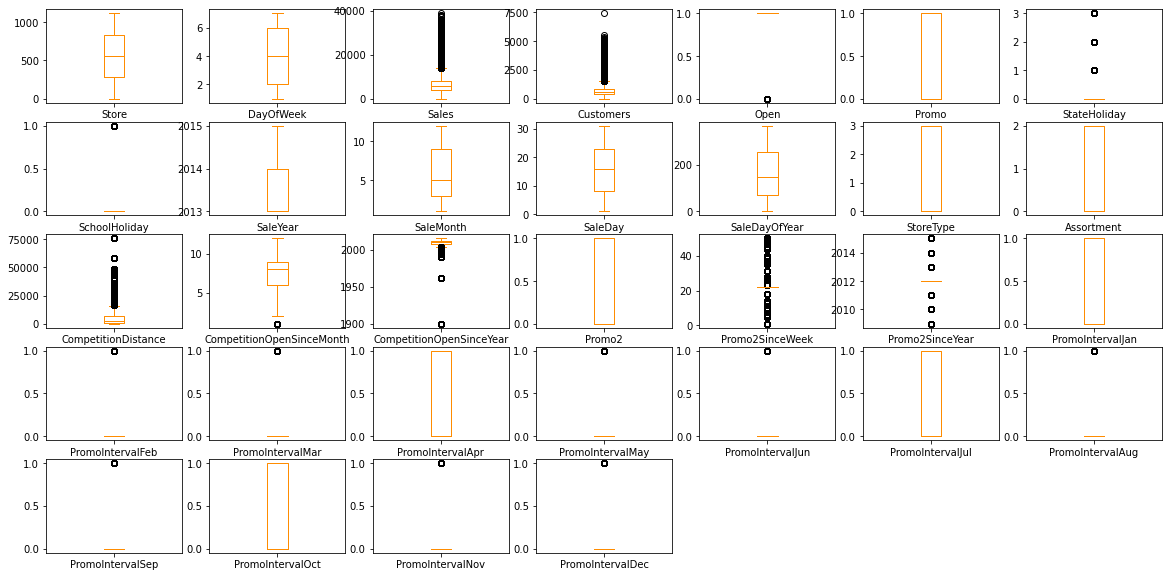

In [87]:
sales_merged_df.plot(kind='box', subplots=True, layout=(5,7),sharex=False,sharey=False, figsize=(20, 10), color='darkorange');

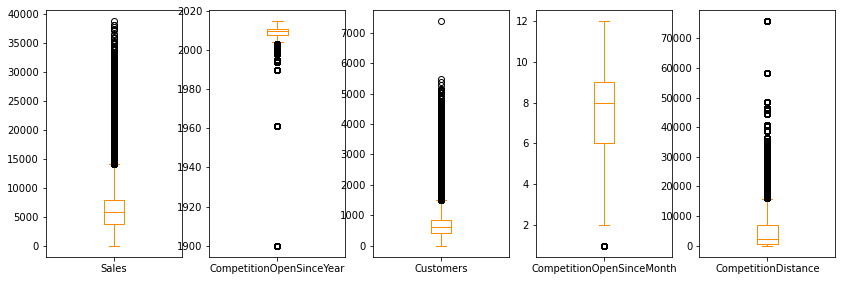

In [103]:
sales_merged_df[["Sales", "CompetitionOpenSinceYear", "Customers", "CompetitionOpenSinceMonth", "CompetitionDistance"]].plot(kind='box', subplots=True, layout=(2,7),sharex=False,sharey=False, figsize=(20, 10), color='darkorange');

array([   1,    2,    3, ..., 1113, 1114, 1115], dtype=int64)

In [97]:
# Acceptable
sales_merged_df.CompetitionOpenSinceMonth.value_counts()

8.0     323378
9.0     102754
4.0      78428
11.0     75991
3.0      57108
7.0      53270
12.0     52008
10.0     50010
6.0      40844
5.0      35560
2.0      34114
1.0      11164
Name: CompetitionOpenSinceMonth, dtype: int64

In [120]:
check_features = ["CompetitionOpenSinceYear", "Customers", "CompetitionDistance", "Sales"]

In [121]:
def outliers_three_sigma(data_frame, features):
    for feature in features.columns:
        feature_data = data_frame[feature]
        mean_val = np.mean(feature_data)
        std_val = np.std(feature_data)
        lower_limit = max(0, mean_val - 3*std_val)
        upper_limit = mean_val + 3*std_val
        print(f"Analyzing Feature: {feature}")
        print(f"     Mean: {mean_val:.2f}, Standard dev: {std_val:.2f} , Lower Limit: {lower_limit:.2f}, Upper Limit: {upper_limit:.2f}")
        data_frame = data_frame[data_frame[feature] >= lower_limit]
        data_frame = data_frame[data_frame[feature] <= upper_limit]
    return data_frame

def outliers_iqr(data_frame, features):
    for feature in features.columns:
        feature_data = data_frame[feature]
        Q1 = np.percentile(feature_data, 25.) 
        Q3 = np.percentile(feature_data, 75.) 
        IQR = Q3-Q1 
        outlier_step = IQR * 1.5 
        print(f"Analyzing Feature: {feature}")
        print(f"     Quartile 1: {Q1:.2f}, Quartile 3: {Q3:.2f}, Interquartile Range: {IQR:.2f}, Outlier Step: {outlier_step:.2f}")
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        data_frame.drop(outliers, inplace = True, errors = 'ignore')
    return data_frame

In [122]:
sales_merged_df_three_sigma = sales_merged_df.copy(deep=True)
sales_merged_df_three_sigma = outliers_three_sigma(sales_merged_df_three_sigma, sales_merged_df[check_features])

Analyzing Feature: CompetitionOpenSinceYear
     Mean: 2009.11, Standard dev: 4.97 , Lower Limit: 1994.20, Upper Limit: 2024.01
Analyzing Feature: Customers
     Mean: 633.77, Standard dev: 465.34 , Lower Limit: 0.00, Upper Limit: 2029.79
Analyzing Feature: CompetitionDistance
     Mean: 5508.23, Standard dev: 7769.09 , Lower Limit: 0.00, Upper Limit: 28815.50
Analyzing Feature: Sales
     Mean: 5597.48, Standard dev: 3592.65 , Lower Limit: 0.00, Upper Limit: 16375.44


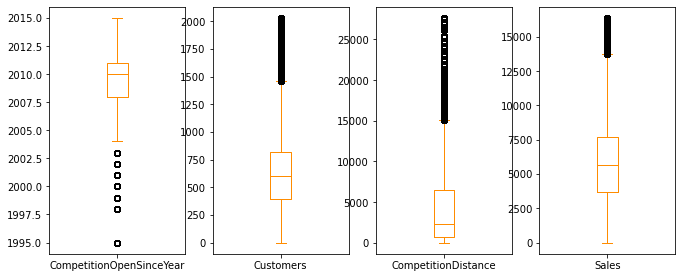

In [123]:
sales_merged_df_three_sigma[check_features].plot(kind='box', subplots=True, layout=(2,7),sharex=False,sharey=False, figsize=(20, 10), color='darkorange');

In [124]:
sales_merged_df_iqr = sales_merged_df.copy(deep=True)
sales_merged_df_iqr = outliers_iqr(sales_merged_df_iqr, sales_merged_df[check_features])

Analyzing Feature: CompetitionOpenSinceYear
     Quartile 1: 2008.00, Quartile 3: 2011.00, Interquartile Range: 3.00, Outlier Step: 4.50
Analyzing Feature: Customers
     Quartile 1: 407.00, Quartile 3: 839.00, Interquartile Range: 432.00, Outlier Step: 648.00
Analyzing Feature: CompetitionDistance
     Quartile 1: 780.00, Quartile 3: 6890.00, Interquartile Range: 6110.00, Outlier Step: 9165.00
Analyzing Feature: Sales
     Quartile 1: 3625.00, Quartile 3: 7521.00, Interquartile Range: 3896.00, Outlier Step: 5844.00


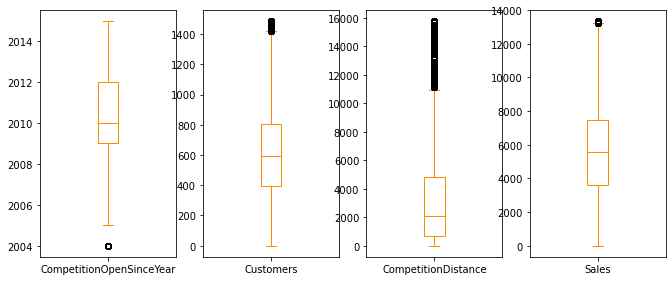

In [125]:
sales_merged_df_iqr[check_features].plot(kind='box', subplots=True, layout=(2,7),sharex=False,sharey=False, figsize=(20, 10), color='darkorange');

In [127]:
sales_merged_df_iqr.size/sales_merged_df.size*100, sales_merged_df_three_sigma.size/sales_merged_df.size*100

(78.85853171067177, 95.26026399775209)

In [128]:
sales_merged_df = outliers_three_sigma(sales_merged_df, sales_merged_df[check_features])

Analyzing Feature: CompetitionOpenSinceYear
     Mean: 2009.11, Standard dev: 4.97 , Lower Limit: 1994.20, Upper Limit: 2024.01
Analyzing Feature: Customers
     Mean: 633.77, Standard dev: 465.34 , Lower Limit: 0.00, Upper Limit: 2029.79
Analyzing Feature: CompetitionDistance
     Mean: 5508.23, Standard dev: 7769.09 , Lower Limit: 0.00, Upper Limit: 28815.50
Analyzing Feature: Sales
     Mean: 5597.48, Standard dev: 3592.65 , Lower Limit: 0.00, Upper Limit: 16375.44


In [130]:
# 95% of the dataset
sales_merged_df.size

27880896

## 4. Modelling

#### 4.1 Separating between training and validation

In [131]:
sales_merged_df

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SaleYear,SaleMonth,...,PromoIntervalMar,PromoIntervalApr,PromoIntervalMay,PromoIntervalJun,PromoIntervalJul,PromoIntervalAug,PromoIntervalSep,PromoIntervalOct,PromoIntervalNov,PromoIntervalDec
0,1115,2,0,0,0,0,1,1,2013,1,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,379,2,0,0,0,0,1,1,2013,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,378,2,0,0,0,0,1,1,2013,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,377,2,0,0,0,0,1,1,2013,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,376,2,0,0,0,0,1,1,2013,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914623,745,4,10782,942,1,1,0,0,2015,4,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
914624,746,4,9469,748,1,1,0,0,2015,4,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
914626,748,4,9524,746,1,1,0,0,2015,4,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
914627,742,4,12225,1196,1,1,0,0,2015,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
sales_merged_df.SaleYear.value_counts()

2013    388057
2014    355403
2015    127818
Name: SaleYear, dtype: int64

In [140]:
(388057 + 355043) / 871278 * 100

85.28850722731435

In [142]:
# Split data into training and validation
df_val = sales_merged_df[sales_merged_df.SaleYear == 2015]
df_train = sales_merged_df[sales_merged_df.SaleYear != 2015]

len(df_val), len(df_train)

(127818, 743460)

In [143]:
# Split data into X & y
X_train, y_train = df_train.drop("Sales", axis=1), df_train.Sales
X_valid, y_valid = df_val.drop("Sales", axis=1), df_val.Sales

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((743460, 31), (743460,), (127818, 31), (127818,))

#### 4.2 Evaluation Function

* MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
* MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
* RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
* R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

Source: https://www.datatechnotes.com/2019/02/regression-model-accuracy-mae-mse-rmse.html

In [221]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# acc_tracker = pd.DataFrame(columns = ['Estimator', 'Training MAE', 'Valid MAE', "Training RMSE", "Valid RMSE", "TrainingR^2", "ValidR^2"])
# print(df)
model_accuracies = []
# Create function to evaluate our model
def show_scores(estimator, model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Estimator": estimator,
              "Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSE": np.sqrt(mean_squared_error(y_train, train_preds)),
              "Valid RMSE": np.sqrt(mean_squared_error(y_valid, val_preds)),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    model_accuracies.append(list(scores.values()))
    return scores

# df = pd.DataFrame (accuracies, columns = ['Estimator', 'Training MAE', 'Valid MAE', "Training RMSE", "Valid RMSE", "TrainingR^2", "ValidR^2"])
# df

#### 4.3 Estimators

In [243]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

dict_regressors = {
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42),
    "ElasticNet": ElasticNet(random_state=42),
    "LinearBayesianRidge": linear_model.BayesianRidge(),
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)}

model_accuracies = []

In [ ]:
for model, model_instantiation in dict_regressors.items():
    current_model = model_instantiation
    current_model.fit(X_train, y_train)
    show_scores(model, current_model)

In [ ]:
model_accuracies_df = pd.DataFrame (model_accuracies, columns = ['Estimator', 'Training MAE', 'Valid MAE', "Training RMSE", "Valid RMSE", "TrainingR^2", "ValidR^2"])
model_accuracies_df

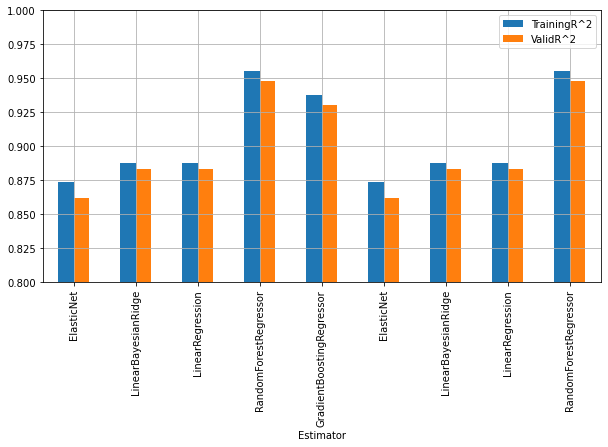

In [242]:
model_accuracies_df.plot(x='Estimator', y=['TrainingR^2', 'ValidR^2'], figsize=(10,5), grid=True, kind='bar', ylim=(0.8,1));

#### 4.4 Hyperparameter Tuning